### Domain : Health-Care


The field of data science is quickly developing and thus a data scientist must spend some time on keeping up with innovations. And for this, domain knowledge plays an important role.

The domain should be chosen so that the researcher has good knowledge about it and can draw meaningful inferences from the data. With good domain knowledge, it will help in understanding the data efficiently to obtain accurate conclusions.


With the help of Data Science in healthcare domain, it has now become possible to detect the symptoms of a disease at a very early stage. Also, with the advent of various innovative tools and technologies, doctors are now able to monitor patients’ conditions from remote locations. 

Previously, the hospital management was not able to handle multiple numbers of patients at the same time and due to the lack of proper treatment, the patients’ conditions used to get worse.

However, the scenario has changed now. With the help of Data Science and Machine Learning applications, doctors can be notified about the health conditions of the patients through wearable devices which are capable of collecting data from the patients such as their heart rate, blood pressure, body temperature, etc and hospital management can take necessary steps in assisting the patients. This is how Data Science helps in caring for patients using technology.



### Dataset : Pima Indians Diabetes Database from Kaggle

This dataset is taken originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

Diabetes is one of the fastest growing chronic life threatening diseases that have already affected 422 million people worldwide according to the report of World Health Organization (WHO), in 2018. Due to the presence of a relatively long asymptomatic phase, early detection of diabetes is always desired for a clinically meaningful outcome. Around 50% of all people suffering from diabetes are undiagnosed because of its long-term asymptomatic phase.

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. There are 768 observations and 8 independent variables in the dataset. The target variable indicates the test result of the patient. It is 1 when the test result is positive and 0 when the test result is negative.

### Understanding the Data




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import itertools
plt.style.use('fivethirtyeight')

In [2]:
#Loading the dataset
location=("C:\\Users\\krishna meghana\\Downloads\\diabetes.csv")
data = pd.read_csv(location)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 The diabetes dataset contains 768 rows and 9 features including the target variable in which all are numeric in nature. No categorical features exist. But there are some features which can be turn into categorical, like Glucose level, BMI, Age groups.

Outcome is the target variable which has values 0 and 1 indicating whether the patient has diabetes or not.

Description of the Attributes:

- Pregnancies --- Number of times pregnant
- Glucose --- The blood plasma glucose concentration after a 2 hour oral glucose tolerance test (mg/dL)
- BloodPressure --- Diastolic blood pressure (mm/Hg)
- SKinThickness --- Skinfold Triceps skin fold thickness (mm)
- Insulin --- 2 Hour serum insulin (mu U/ml)
- BMI --- Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction --- A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
- Age 
- Outcome --- Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no)

In [6]:
#Checking for missing values

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

- count tells us the number of NoN-empty rows in a feature.
- mean tells us the mean value of that feature.
- std tells us the Standard Deviation Value of that feature.
- min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
- max tells us the maximum value of that feature.

#### Exploratory Data Analysis

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are no missing values in the dataset but if we observe the dataset, we can see that lots of features have 0 values. For example in BloodPressure, BMI, Glucose, Insulin etc.. where having 0 for those features make no sense like having 0 bloodpressure or BMI etc. 

It appears as if zero was used as a imputer value in original data for missing values. We can treat them as missings and impute with proper values.

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [8]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


To fill these Nan values the distribution of data needs to be understood. 

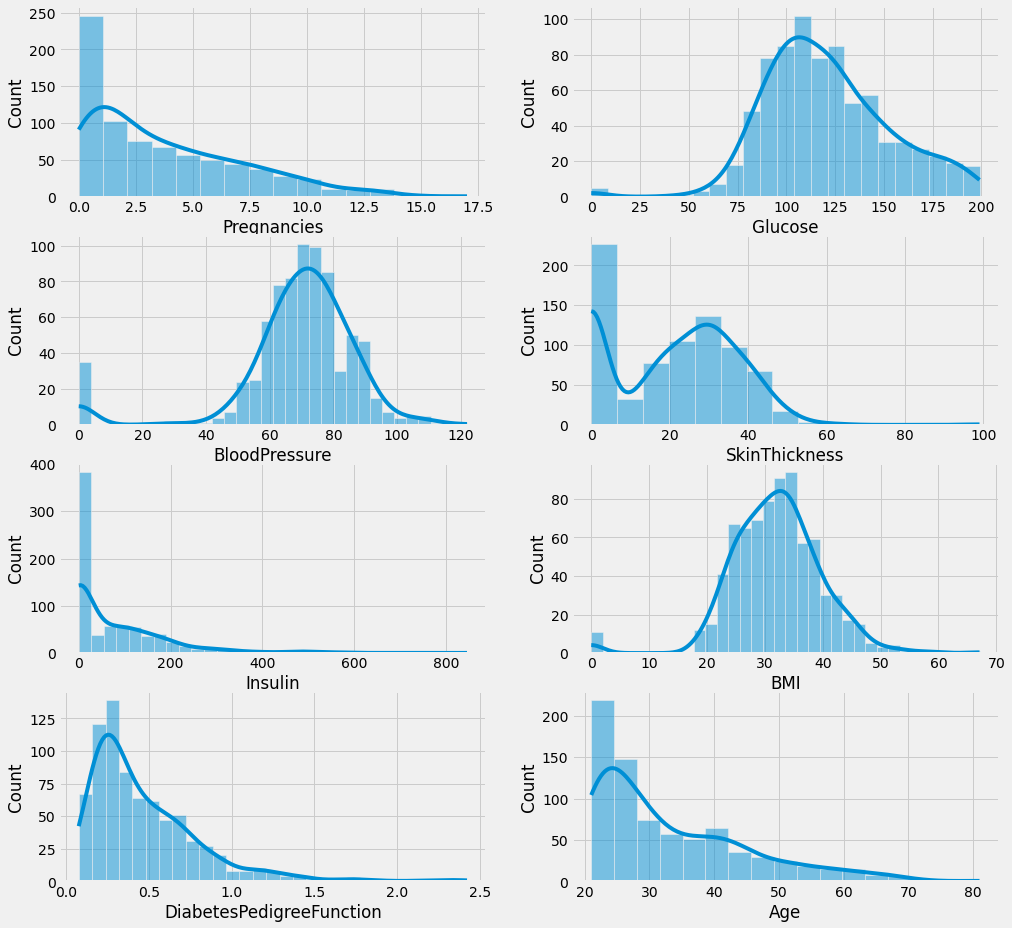

In [9]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,2,i+1)
    sns.histplot(x = col, data = data, kde = True)
plt.show()

We can say the data is skewed to the right if mean is grater than the median value and vice versa. Such situation is significantly observed for Insulin. The data also seems to have some outliers which can be viewed using boxplot.

The missing values can either be imputed with mean or median or any value or they can be deleted from the dataset for further analysis. Here, we are trying to replacae them with mean values

In [10]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

In [11]:
data_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data_copy.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\krishna meghana\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

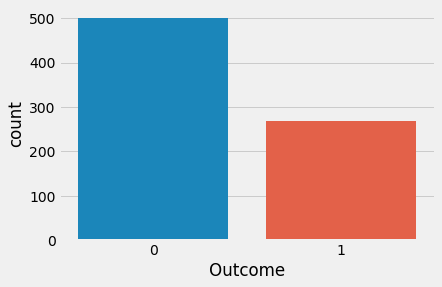

In [13]:
sns.countplot('Outcome',data=data_copy)

There are 66.8% 1’s (diabetic) and 33.1% 0’s (nondiabetic) in the data

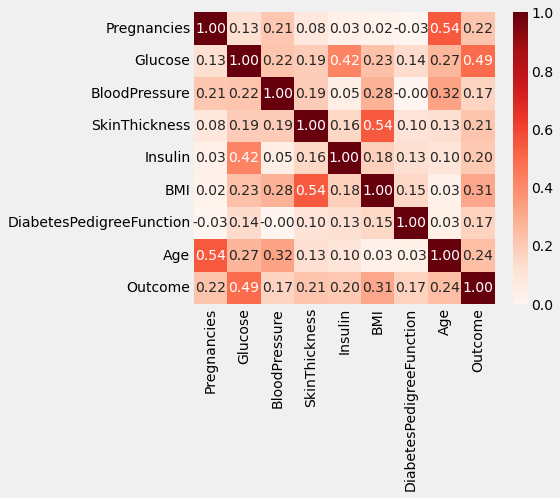

In [14]:
plt.figure(figsize = (6.0, 5.0))
plt.grid(False)
plt.xticks(range(data_copy.shape[1]), data_copy.columns[0:], rotation=0)
plt.yticks(range(data_copy.shape[1]), data_copy.columns[0:], rotation=0)
sns.heatmap(data_copy.corr(), cbar=True, annot=True, square=False, fmt='.2f', cmap=plt.cm.Reds, robust=False, vmin=0)
plt.show()

The coefficient can only take values between -1 and 1:
- the closer the value to 1, the higher the positive linear relationship.
- the closer the value to 0, the lower the linear relationship.
- the closer the value to -1, the higher the negative linear relationship.

As we observe not much correlation between features except for some values that are greater than 0.5 The features are:

Age-Pregnancies : Pregnancies can increase with age and stop after a certain age

Glucose-Diabetes : Higher glucose count has higher probability of being diagnose with diabetes

Glucose-Insulin : Higher level Glucose means more Insulin

BMI-SkinThickness : Higher the BMI, fatter the person is

In [15]:
data_copy.corrwith(data_copy['Outcome'],axis = 0).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
dtype: float64

Glucose is the most correlated feature with the target/dependent feature 'Outcome'. Also after Glucose the most correlated ones are Age and BMI.

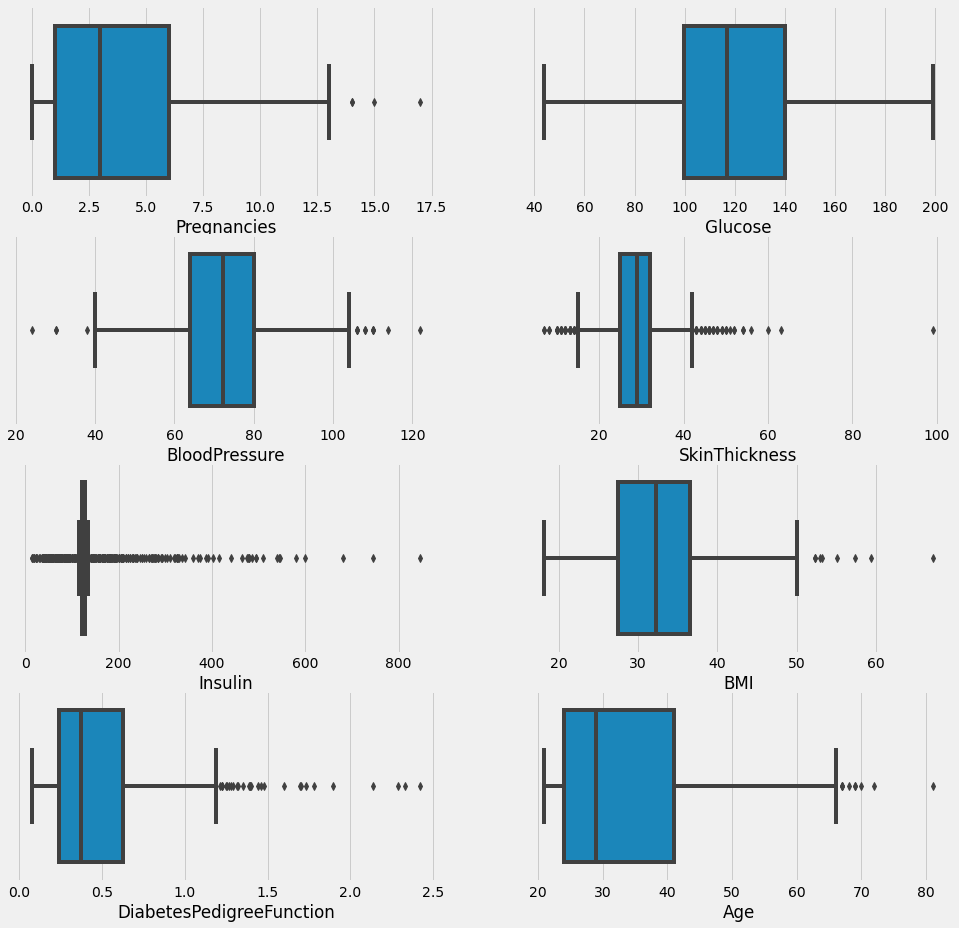

In [16]:
#box plot to visualize the skewness and outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data_copy)
plt.show()

There are some outliers which may interfere with the model building and give inaccurate results. They should be removed from the dataset.

In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

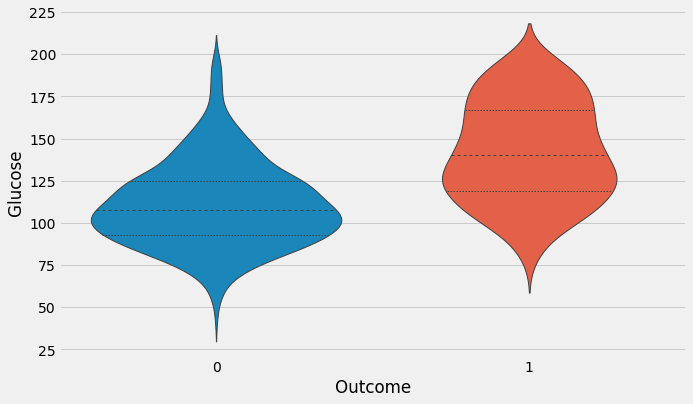

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data_copy, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

The chances of diabetes is gradually increasing with level of Glucose

Analysis of Diabetic Cases

C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_26892/73666463.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)
C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_26892/73666463.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


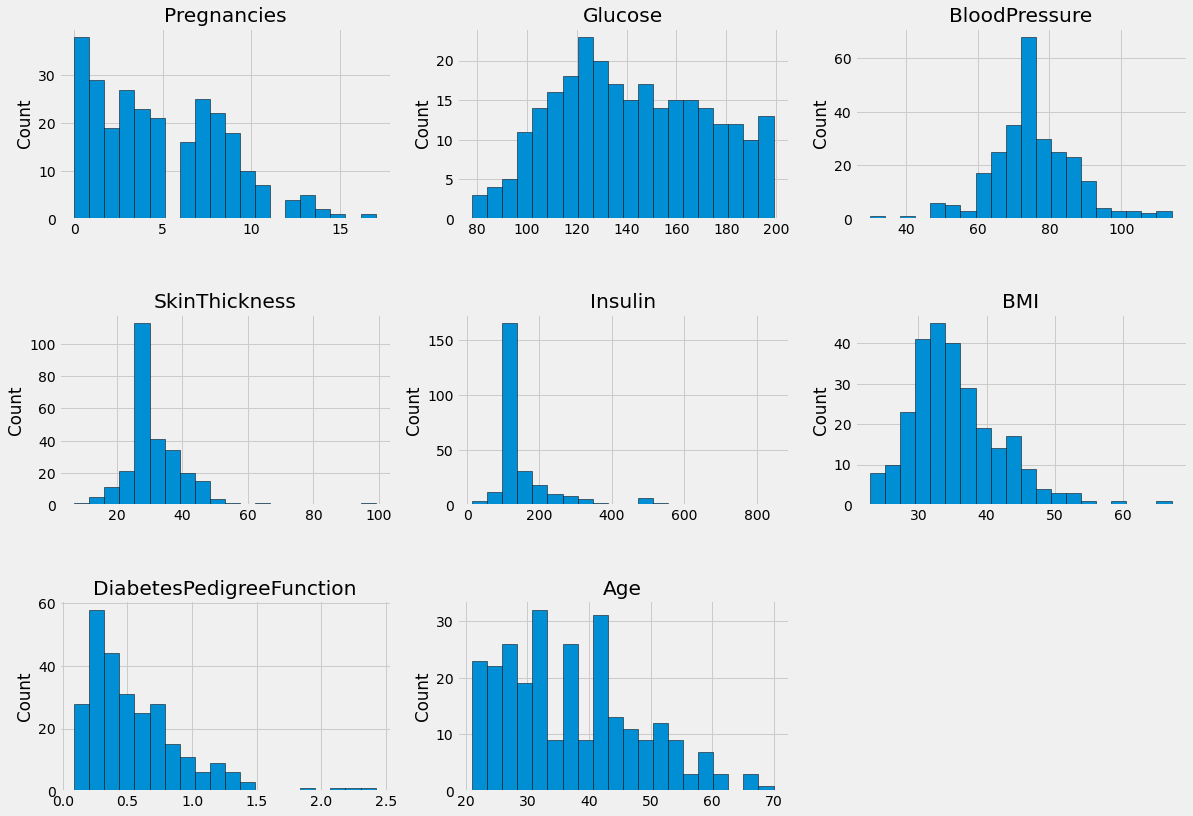

In [18]:
data1 = data_copy[data_copy["Outcome"]==1]
columns = data_copy.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()


Analysis of Non-Diabetic Cases

C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_26892/4037623451.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


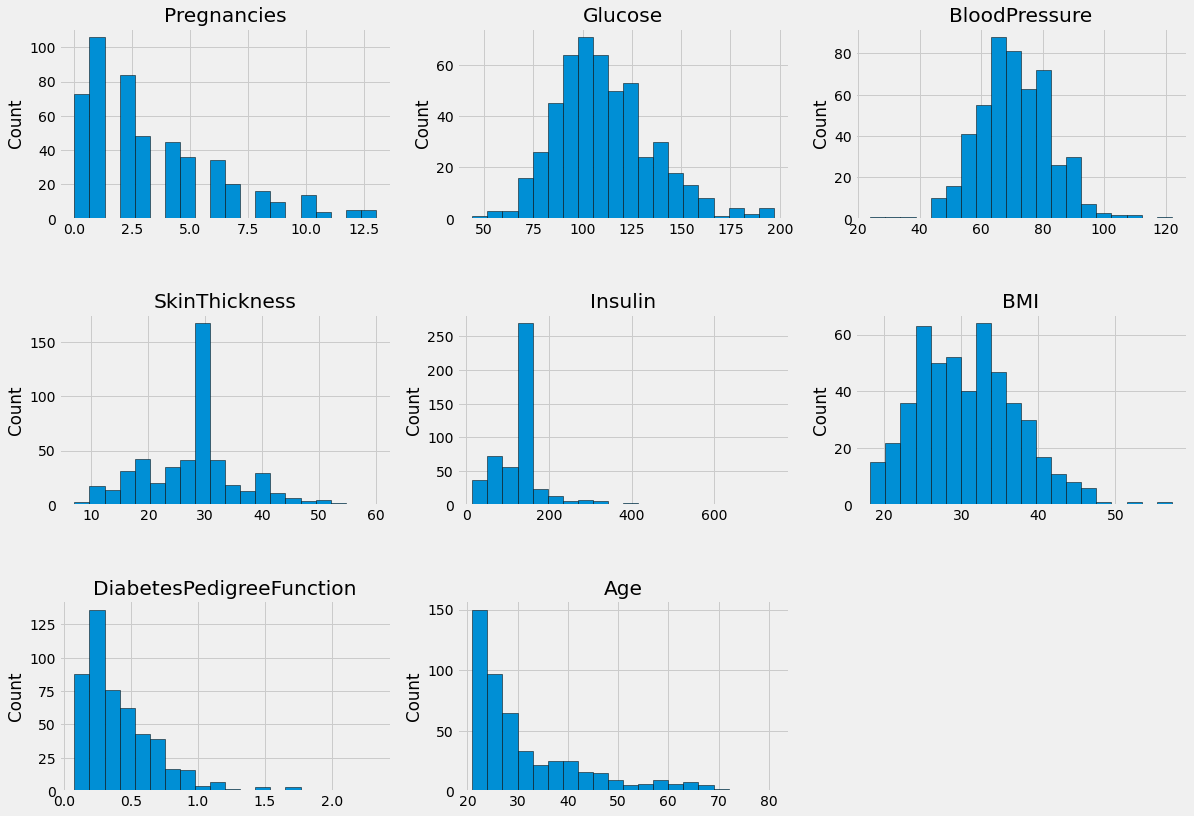

In [19]:
data1 = data_copy[data_copy["Outcome"]==0]
columns = data_copy.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Next, we need to select only the features which are necessary for the analysis. this can be done by methods like Principal component analysis PCA etc. But since the dataset has only 8 features excluding the target variable, any dumping of the variables maynot produce accurate results.

Further, we split the data into training and testing so that we can the Machine Learning models on the data.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = data_copy.drop(['Outcome'], axis = 1).copy()
y = data_copy['Outcome'].copy()

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [23]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


### Supervised Classification Model

As the target variable has values 0 and 1 indicating if the patient is diabetic or not, it is a classiccation problem.  We can use Supervised models such as :

- Logistic Regression
- Decision Tree Classifier
- K Nearest Neighbors Classifier
- Gradient Boosting Classifier
- Random Forest Classifier

We scale the training and testing data for better fitting of the model. Then we fit the above mentioned models and predict the target variable values for the testing data based on the trained model. We check the model and accuracy score of the models and then compare them to obtain the best model suitable for the data.

One of the most commonly used method to check accuracy of the classfier models is Confusion Matrix.It is a square matrix that visually reports the counts of the true positive, true negative, false positive, and false negative predictions of a classifier. The sum of the diagonal elements of the matrix gives the correctly predicted values. Cross validation can also be used to compare the accuracy of models used.